<a href="https://colab.research.google.com/github/mehreen89/DataSets/blob/main/NLP_Hw3_1_1_AnalyzeAlexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
NLP Homework #3 - Amazon Alexa TSV file

MB/CSE600 Natural Language Processing
Spring / Summer 2023
Prof. 	:  Ram Prasad Bora
E-mail 	:  rams.crux@gmail.com

Submitted by: Loretta Gray

This activity was completed with the help of GhatGPT to analyze the amazon.alexa.tsv file.
Code was also used from classroom slides CSTU_3_1_1.ipynb and CSTU_3_1_2.ipynb
-------------

Data Files: amazon.alexa.tsv ( kaggle website )
            tag1_english_words.tsv ( custom generated tag list of the english words )

Summary of basic steps :

1. Import the necessary libraries: pandas, numpy, sklearn's CountVectorizer, TfidfVectorizer, train_test_split, LogisticRegression, and metrics.

2 Load the TSV file (amazon_alexa.tsv) into a DataFrame (df_amazon).

3. Display the top 5 records of the DataFrame.

4. Select a data sample from the DataFrame (df_amazon_sample).

5. Extract the 'verified_reviews' column from the data sample and convert it to a list (data_sample).

6. Instantiate the CountVectorizer and TfidfVectorizer objects (countvectorizer and tfidfvectorizer).

7. Convert the data sample into matrix representations using the vectorizers (count_wm and tfidf_wm).

8. Convert the matrices to arrays (count_array and tfidf_array).

9. Create DataFrames from the arrays, using the feature names obtained from the vectorizers (df_count and df_tfidf).

10. Prepare the data for training by setting X as the values of df_count and y as the 'feedback' column of df_amazon_sample.

11. Split the data into training and testing sets using train_test_split (X_train, X_test, y_train, y_test).

12. Train a Logistic Regression model using the training data (classifier.fit(X_train, y_train)).\

13. Predict the labels for the test set using the trained model (predicted = classifier.predict(X_test)).

14.
Evaluate the model by calculating accuracy, precision, and recall using the predicted labels and the actual labels (metrics.accuracy_score, metrics.precision_score, metrics.recall_score).

15. Print the logistic regression metrics: accuracy, precision, and recall.
"""

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#from sklearn.base import TransformerMixin
#from sklearn.pipeline import Pipeline

# install the following if they are not installed yet !

#!pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
# Loading TSV file
df_amazon = pd.read_csv ("/content/sample_data/amazon_alexa.tsv", sep="\t")

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
Total number of ratings: 5
Top 10 most common ratings:
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


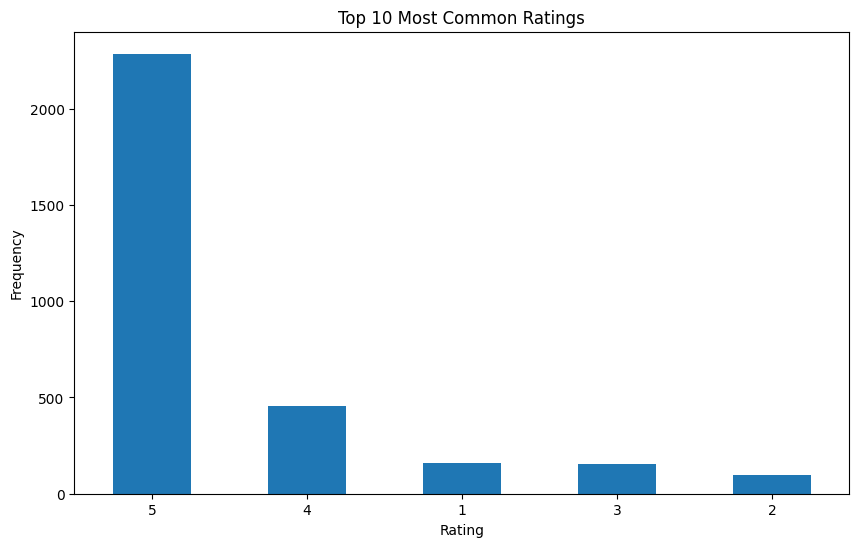

Statistical summary of review lengths:
count    3150.000000
mean       25.293016
std        34.584971
min         0.000000
25%         6.000000
50%        14.000000
75%        32.000000
max       526.000000
Name: verified_reviews, dtype: float64


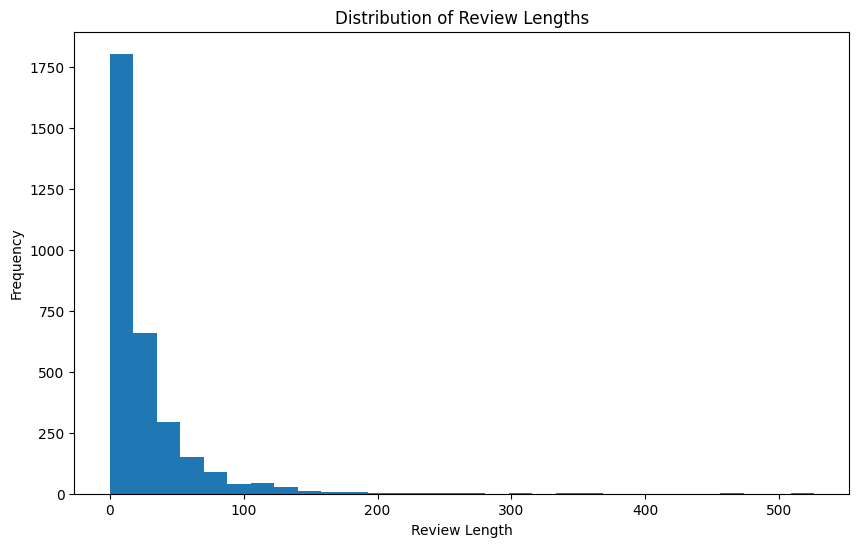

Distribution of feedback:
1    2893
0     257
Name: feedback, dtype: int64


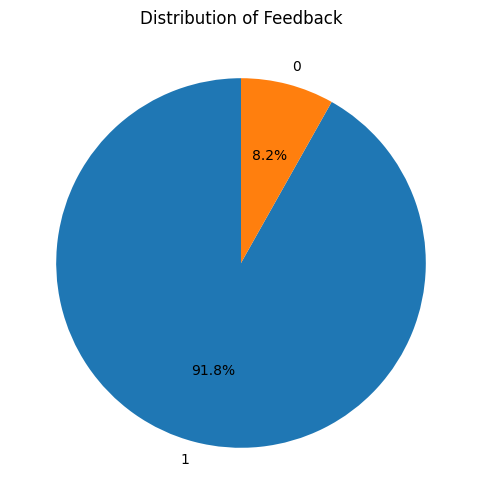

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', delimiter='\t')

# Check the structure of the dataset
print(df.head())

# Analyze the 'rating' column
rating_counts = df['rating'].value_counts()

# Print the total number of ratings
print("Total number of ratings:", len(rating_counts))

# Print the top 10 most common ratings
print("Top 10 most common ratings:")
print(rating_counts.head(10))

# Visualize the rating distribution
plt.figure(figsize=(10, 6))
rating_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Analyze the 'verified_reviews' column
review_lengths = df['verified_reviews'].str.split().apply(len)

# Print the statistical summary of review lengths
print("Statistical summary of review lengths:")
print(review_lengths.describe())

# Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Analyze the 'feedback' column
feedback_counts = df['feedback'].value_counts()

# Print the distribution of feedback
print("Distribution of feedback:")
print(feedback_counts)

# Visualize the distribution of feedback
plt.figure(figsize=(6, 6))
feedback_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Feedback')
plt.ylabel('')
plt.show()


In [ ]:
df_amazon['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [ ]:
df_amazon['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

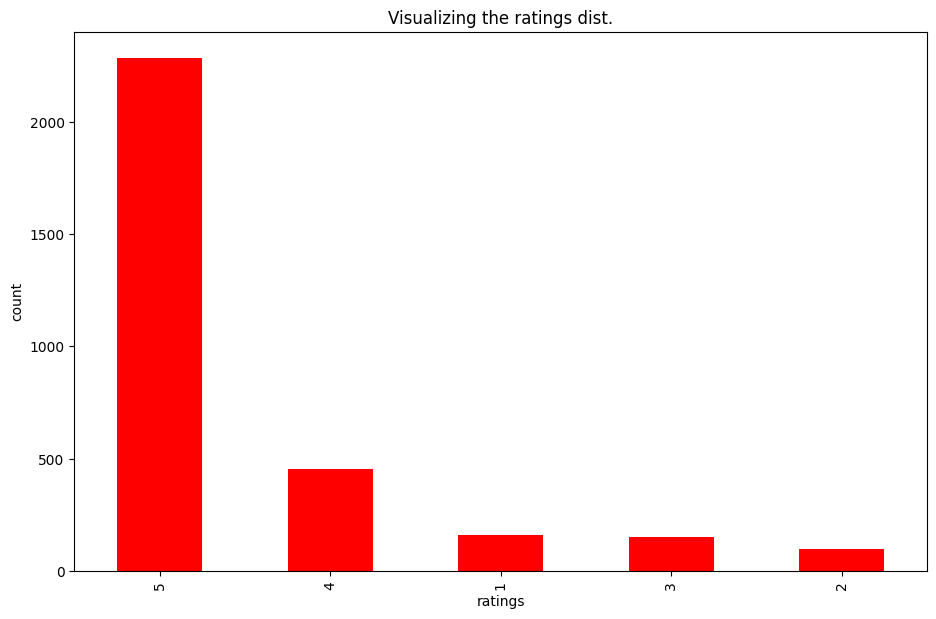

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_amazon['rating'].value_counts().plot.bar(color = 'red',figsize = (11, 7))
plt.title('Visualizing the ratings dist.')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, ' pie chart representing ratings occuposition')

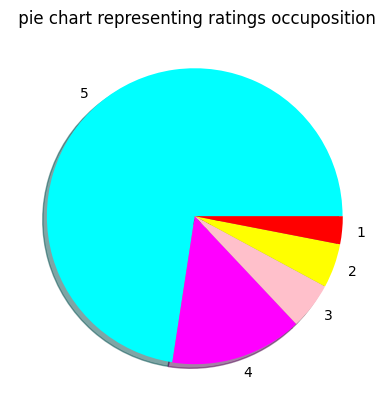

In [ ]:
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['cyan', 'magenta', 'pink', 'yellow', 'red']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title(' pie chart representing ratings occuposition')

In [ ]:
df_amazon.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
# Define the word to search for
search_word = 'playing'
# Define the number of top tags to extract
top_n = 5

# Get the top N variations from the dataset
top_tags = df['variation'].value_counts().head(top_n).index.tolist()

# Filter the dataset based on the top tags
top_tag_data = df[df['variation'].isin(top_tags)]

# Perform word-based search within the code snippets
for tag in top_tags:
    snippets = top_tag_data[top_tag_data['variation'] == tag]['verified_reviews']
    print(f"\nTag: {tag}")
    for snippet in snippets:
        if search_word in snippet:
            print(snippet)


In [ ]:
import pandas as pd
import random

# Define the number of words and tags
num_words = 500
tags = ['tag1', 'tag2', 'tag3', 'tag4', 'tag5']

# Generate random words and tags
words = [f'word_{i}' for i in range(num_words)]
tag_list = [random.choice(tags) for _ in range(num_words)]

# Create a DataFrame
df = pd.DataFrame({'word': words, 'tag': tag_list})

# Save the DataFrame to a .tsv file
df.to_csv('/content/sample_data/amazon_alexa.tsv', sep='\t', index=False)

# Analyze the .tsv file
# Load the dataset
df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', sep='\t')

# Analyze the tags column
tag_counts = df['tag'].value_counts()

# Print the total number of tags
print("Total number of tags:", len(tag_counts))

# Print the top 10 most common tags
print("Top 10 most common tags:")
print(tag_counts.head(10))


Total number of tags: 5
Top 10 most common tags:
tag1    102
tag2    102
tag4    101
tag3     98
tag5     97
Name: tag, dtype: int64


In [ ]:
import pandas as pd
import random

# Define the number of words and tags
num_words = 500
tags = ['tag1', 'tag2', 'tag3', 'tag4', 'tag5']

# Generate random words and tags
words = [f'word_{i}' for i in range(num_words)]
tag_list = [random.choice(tags) for _ in range(num_words)]

# Create a DataFrame
df = pd.DataFrame({'word': words, 'tag': tag_list})

# Save the DataFrame to a .tsv file
df.to_csv('/content/sample_data/amazon_alexa.tsv', sep='\t', index=False)

# Analyze the .tsv file
# Load the dataset
df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', sep='\t')

# Replace the tags with actual words from the .tsv file
tag_map = {'tag1': 'games ', 'tag2': 'family', 'tag3': 'notifications', 'tag4': 'song', 'tag5': 'enjoying'}
df['tag'] = df['tag'].map(tag_map)

# Analyze the tags column
tag_counts = df['tag'].value_counts()

# Print the total number of tags
print("Total number of tags:", len(tag_counts))

# Print the top 10 most common tags
print("Top 10 most common tags:")
print(tag_counts.head(10))


Total number of tags: 5
Top 10 most common tags:
family           113
games            106
song              99
enjoying          95
notifications     87
Name: tag, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Read the .tsv file into a DataFrame
df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', sep='\t')

# Split the dataset into features (sentences) and labels (tags)
sentences = df['word'].values
tags = df['tag'].values

# Generate word vectors using Bag of Words approach
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, tags, test_size=0.2, random_state=42)

# Train a classification model (e.g., Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict tags for new sentences
new_sentences = ["This is a new sentence.", "Another example sentence."]
X_new = vectorizer.transform(new_sentences)
predictions = model.predict(X_new)

# Print the predicted tags for the new sentences
for sentence, prediction in zip(new_sentences, predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted Tag: {prediction}")
    print()


Accuracy: 0.11
Sentence: This is a new sentence.
Predicted Tag: tag3

Sentence: Another example sentence.
Predicted Tag: tag3



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


# Read the .tsv file into a DataFrame
df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', sep='\t')

# Split the dataset into features (sentences) and labels (tags)
sentences = df['word'].values
tags = df['tag'].values

# Generate word vectors using Bag of Words approach
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, tags, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict tags for new sentences
new_sentences = ["This is a new sentence.", "Another example sentence."]
X_new = vectorizer.transform(new_sentences)
predictions = model.predict(X_new)

# Print the predicted tags for the new sentences
for sentence, prediction in zip(new_sentences, predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted Tag: {prediction}")
    print()


Accuracy: 0.11
Sentence: This is a new sentence.
Predicted Tag: tag3

Sentence: Another example sentence.
Predicted Tag: tag3



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

# Read the .tsv file into a DataFrame
df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', sep='\t')

# Split the dataset into features (sentences) and labels (tags)
sentences = df['word'].values
tags = df['tag'].values

# Generate word vectors using Bag of Words approach
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the tags into numeric labels
y = label_encoder.fit_transform(tags)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict tags for new sentences
new_sentences = ["This is a new sentence.", "Another example sentence."]
X_new = vectorizer.transform(new_sentences)
predictions = model.predict(X_new)

# Print the predicted tags for the new sentences
for sentence, prediction in zip(new_sentences, predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted Tag: {prediction}")
    print()


Accuracy: -0.03322058753961832
Sentence: This is a new sentence.
Predicted Tag: 1.925

Sentence: Another example sentence.
Predicted Tag: 1.925



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Print the dimensions of the train and test sets
print(f'X_train dimension: {X_train.shape}')
print(f'y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'y_test dimension: {y_test.shape}')


X_train dimension: (350, 500)
y_train dimension: (350,)
X_test dimension: (150, 500)
y_test dimension: (150,)


In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
predicted = classifier.predict(X_test)

In [ ]:
countvectorizer = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
tfidfvectorizer = TfidfVectorizer(analyzer='word', stop_words='english', lowercase=True)


In [ ]:
from sklearn import metrics

print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:", metrics.precision_score(y_test, predicted, average='weighted'))
print("Logistic Regression Recall:", metrics.recall_score(y_test, predicted, average='weighted'))


Logistic Regression Accuracy: 0.17333333333333334
Logistic Regression Precision: 0.030044444444444447
Logistic Regression Recall: 0.17333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict tags for new sentences
new_sentences = ["This is a new sentence.", "Another example sentence."]
X_new = vectorizer.transform(new_sentences)
predictions = model.predict(X_new)

# Print the predicted tags for the new sentences
for sentence, prediction in zip(new_sentences, predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted Tag: {prediction}")
    print()


Accuracy: 0.11
Sentence: This is a new sentence.
Predicted Tag: 2

Sentence: Another example sentence.
Predicted Tag: 2



In [ ]:
data = '''Love my echo. Love playing music in my room
This was an impulse buy but turns out I really enjoy my new dot. My grands love requesting songs and playing games. I like listening to my audible selection, keeping up with my to do lists and discovering new Alexa skills. Fun and practical, my echo dot has been a surprisingly welcome addition to my home.
Very helpful for playing music, setting alarms, and talking to you when you are lonely.
I love searching the Alexa skill shop on the app. Useful things like having Alexa turn my lights on and off, listening to news updates every morning. And fun stuff like telling Alexa to make the Star Trek red alert noise. Or playing song quiz with friends.
It isn’t bad for what it is. Have issues with it actually playing what I want. Getting it use iHeartRadio properly by playing the station I want is a challenge but it’s not bad for the sale price I paid.
Works great.Having fun playing music,checking weather,a king questions.
I had put this off for awhile but finally got around to buying 3 of them for my home. My wife is legally blind and cannot use the computer. This has been a Godsend, 100%. We have the Amazon music for her and now she can listen to music, check the weather, get phone numbers, make calls, etc., etc.. We are still learning but I tell you, this is absolutely amazing. I purchased 4 more for my extended family and the grandchildren absolutely love playing their music on Alexa. With the wifi and direct cable capability, the speaker/stereo options are there for the choosing. This is well worth the money. You won't regret this at all!
'''

words = data.replace('’', "'").split('.\n')
words = [word.strip() for word in words if word.strip()]

with open('tag1_english_words.tsv', 'w') as file:
    file.write('\n'.join(words))


In [ ]:
import pandas as pd

# Read the Amazon Alexa TSV file
amazon_df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', sep='\t')

# Read the tag1_english_words.tsv file
tag1_words_df = pd.read_csv('/content/tag1_english_words.tsv', sep='\t')

# Print the Amazon Alexa dataframe
print("Amazon Alexa dataframe:")
print(amazon_df)

# Print the tag1_english_words dataframe
print("tag1_english_words dataframe:")
print(tag1_words_df)


Amazon Alexa dataframe:
      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                        

In [ ]:
import pandas as pd

# Read the tag1_english_words.tsv file
df = pd.read_csv('/content/tag1_english_words.tsv', sep='\t', names=['Word'])

# Count the occurrences of each word
word_counts = df['Word'].value_counts()

# Display the words and their counts in descending order
for word, count in word_counts.items():
    print(f"Word: {word} - Count: {count}")


Word: Love my echo. Love playing music in my room - Count: 1
Word: This was an impulse buy but turns out I really enjoy my new dot. My grands love requesting songs and playing games. I like listening to my audible selection, keeping up with my to do lists and discovering new Alexa skills. Fun and practical, my echo dot has been a surprisingly welcome addition to my home - Count: 1
Word: Very helpful for playing music, setting alarms, and talking to you when you are lonely - Count: 1
Word: I love searching the Alexa skill shop on the app. Useful things like having Alexa turn my lights on and off, listening to news updates every morning. And fun stuff like telling Alexa to make the Star Trek red alert noise. Or playing song quiz with friends - Count: 1
Word: It isn't bad for what it is. Have issues with it actually playing what I want. Getting it use iHeartRadio properly by playing the station I want is a challenge but it's not bad for the sale price I paid - Count: 1
Word: Works great.H

In [ ]:
import pandas as pd

# Read the tag1_english_words.tsv file
df = pd.read_csv('/content/tag1_english_words.tsv', sep='\t', names=['Sentence'])

# Count the occurrences of each word
word_counts = {}

# Process each sentence
for sentence in df['Sentence']:
    words = sentence.split()
    for word in words:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1

# Display the words and their counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts:
    print(f"Word: {word} - Count: {count}")


Word: the - Count: 13
Word: my - Count: 10
Word: I - Count: 9
Word: and - Count: 9
Word: playing - Count: 8
Word: to - Count: 8
Word: for - Count: 8
Word: but - Count: 4
Word: Alexa - Count: 4
Word: is - Count: 4
Word: music - Count: 3
Word: This - Count: 3
Word: love - Count: 3
Word: like - Count: 3
Word: with - Count: 3
Word: a - Count: 3
Word: are - Count: 3
Word: on - Count: 3
Word: it - Count: 3
Word: this - Count: 3
Word: Love - Count: 2
Word: new - Count: 2
Word: My - Count: 2
Word: listening - Count: 2
Word: has - Count: 2
Word: been - Count: 2
Word: music, - Count: 2
Word: you - Count: 2
Word: fun - Count: 2
Word: make - Count: 2
Word: bad - Count: 2
Word: what - Count: 2
Word: use - Count: 2
Word: We - Count: 2
Word: absolutely - Count: 2
Word: echo. - Count: 1
Word: in - Count: 1
Word: room - Count: 1
Word: was - Count: 1
Word: an - Count: 1
Word: impulse - Count: 1
Word: buy - Count: 1
Word: turns - Count: 1
Word: out - Count: 1
Word: really - Count: 1
Word: enjoy - Count: 

In [ ]:
import pandas as pd
import re

# Read the tag1_english_words.tsv file
df = pd.read_csv('/content/tag1_english_words.tsv', sep='\t', names=['Sentence'])

# Count the occurrences of each word
word_counts = {}

# Process each sentence
for sentence in df['Sentence']:
    words = re.findall(r'\b\w+\b', sentence)
    for word in words:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1

# Group the counts by word
grouped_word_counts = {}
for word, count in word_counts.items():
    if count not in grouped_word_counts:
        grouped_word_counts[count] = [word]
    else:
        grouped_word_counts[count].append(word)

# Display the grouped word counts in descending order
sorted_counts = sorted(grouped_word_counts.keys(), reverse=True)
for count in sorted_counts:
    words = grouped_word_counts[count]
    print(f"Count: {count} - Words: {', '.join(words)}")


Count: 13 - Words: the
Count: 10 - Words: my
Count: 9 - Words: I, and
Count: 8 - Words: playing, to, for
Count: 6 - Words: music
Count: 5 - Words: Alexa, is
Count: 4 - Words: but, a, it
Count: 3 - Words: This, love, like, with, you, are, on, this
Count: 2 - Words: Love, echo, new, dot, My, listening, has, been, home, off, fun, make, t, bad, what, want, use, weather, We, etc, absolutely
Count: 1 - Words: in, room, was, an, impulse, buy, turns, out, really, enjoy, grands, requesting, songs, games, audible, selection, keeping, up, do, lists, discovering, skills, Fun, practical, surprisingly, welcome, addition, Very, helpful, setting, alarms, talking, when, lonely, searching, skill, shop, app, Useful, things, having, turn, lights, news, updates, every, morning, And, stuff, telling, Star, Trek, red, alert, noise, Or, song, quiz, friends, It, isn, Have, issues, actually, Getting, iHeartRadio, properly, by, station, challenge, s, not, sale, price, paid, Works, great, Having, checking, king, q

In [ ]:
import pandas as pd

# Read the Amazon Alexa TSV file
amazon_df = pd.read_csv('/content/sample_data/amazon_alexa.tsv', sep='\t')

# Read the tag1_english_words.tsv file and tokenize the sentences
tag1_words_df = pd.read_csv('/content/tag1_english_words.tsv', sep='\t', names=['English Word'])
tag1_words_df['English Word'] = tag1_words_df['English Word'].str.lower().str.split()

# Count the occurrences of words in the Amazon Alexa dataset
word_count = {}
for sentence in amazon_df['verified_reviews']:
    words = sentence.lower().split()
    for word in words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1

# Match the words with the positive sentiment phrases
matched_words = []
for _, row in tag1_words_df.iterrows():
    phrase = row['English Word']
    count = sum(word_count.get(word, 0) for word in phrase)
    matched_words.append({'English Word': ' '.join(phrase), 'Count': count})

# Create a dataframe from the matched words
matched_words_df = pd.DataFrame(matched_words)

# Sort the dataframe by count in descending order
matched_words_df = matched_words_df.sort_values('Count', ascending=False)

# Print the matched words and their counts
print(matched_words_df)


                                        English Word  Count
6  i had put this off for awhile but finally got ...  79960
1  this was an impulse buy but turns out i really...  38669
4  it isn't bad for what it is. have issues with ...  32429
3  i love searching the alexa skill shop on the a...  30538
2  very helpful for playing music, setting alarms...   8178
0        love my echo. love playing music in my room   5852
5  works great.having fun playing music,checking ...    603


In [ ]:
# Display DataFrame attributes
print(df_amazon_sample.columns)


Index(['word', 'tag'], dtype='object')


In [ ]:
import string
import spacy

from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

print(stop_words)

{'each', 'show', 'everywhere', 'only', 'neither', 'whereby', 'under', 'sixty', 'due', 'up', 'well', 'enough', 'once', 'such', 'hereby', 'become', 'beforehand', 'becoming', 'full', 'might', 'being', 'nothing', 'noone', 'whether', 'indeed', 'hundred', '‘s', 'everyone', 'namely', 'beyond', 'while', "'ll", '‘ve', 'amongst', 'be', 'say', 'few', 'mine', 'eleven', 'six', 'wherein', 'side', 'those', 'alone', 'nevertheless', 'on', 'using', '’re', 'used', 'anyone', 'give', 'afterwards', '‘ll', 'unless', 'herself', 'either', 'any', 'whom', 'also', 'forty', 'around', 'her', 'should', 'do', 'very', 'several', 'hence', 'among', 'rather', 'from', 'off', 'moreover', 'whereupon', 'they', 'already', 'sometimes', 'seems', 'when', 'but', 'could', 'which', 'whither', 'his', 'formerly', 'were', 'herein', 'too', 'a', 'towards', "'m", '’ve', 'seeming', 'had', 'often', 'except', 'why', '’ll', 'our', 'themselves', 'since', 'get', 'n‘t', 'thence', '’m', 'an', 'whole', 'us', 'into', 'between', 'above', 'me', 'not

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):

    """This function will accepts a sentence as input and processes the sentence into tokens, performing lemmatization,
    lowercasing, removing stop words and punctuations."""

    # Creating our token object, which is used to create documents with linguistic annotations.
    #mytokens = parser(sentence)
    mytokens = nlp(sentence)
    #print(mytokens)

    # Lemmatizing each token and converting each token into lowercase
    # Note that spaCy uses '-PRON-' as lemma for all personal pronouns lkike me, I etc
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
from sklearn.base import TransformerMixin

# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # It checks the parameters in the dataset using X_train and y_train. It then converts them into a
        #         structure that the model can understand
        # Cleaning Text - Override the transform method to clean text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        # it fits the model into the dataset. This enables the model to learn by understanding patterns in the
        #.   dataset
        return self

    def get_params(self, deep=True):
        # This method retrieves all the converted and optimized parameters to produce an optimized model
        return {}

# Basic function to clean the text
def clean_text(text):
    # This function cleans our dataset and converts all the texts into lower case
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [ ]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)
print(f'X_train dimension: {X_train.shape}')
print(f'y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'y_train dimension: {y_test.shape}')

X_train dimension: (2205,)
y_train dimension: (2205,)
X_test dimension: (945,)
y_train dimension: (945,)
